# # Property Price Prediction

# Problem Statement
A key challenge for property sellers is to determine the sale price of the property. The ability to predict the exact property value is beneficial for property investors as well as for buyers to plan their finances according to the price trend. The property prices depend on the number of features like the property area, basement square footage, year built, number of bedrooms, and so on. Regression analysis can be useful in predicting the price of the house.

In [168]:
# import the requried library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#  Read Data

In [169]:
# read dataset
df=pd.read_csv("HousePrices_RVMP.csv")

In [170]:
#  first five data in the dataset
df.head()

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [171]:
#  last five data in the dataset
df.tail()

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
2068,942,60,RL,NaN,8755,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,Gilbert,RRNn,Norm,1Fam,2Story,8,4,1936,1999,Gable,CompShg,VinylSd,VinylSd,BrkFace,298.0,Gd,TA,PConc,Gd,TA,No,ALQ,772,Unf,0,220,992,GasA,Ex,Y,SBrkr,1022,1038,0,2060,1,0,2,1,3,1,Gd,8,Typ,1,TA,BuiltIn,1999.0,RFn,2,390,TA,TA,Y,0,0,0,168,0,0,NaN,GdPrv,NaN,0,6,2009,WD,Normal,214000
2069,943,90,RL,63.0,7711,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,6,9,1936,1977,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,PConc,Gd,TA,Gd,GLQ,1440,Unf,0,0,1440,GasA,TA,Y,SBrkr,1440,0,0,1440,2,0,2,0,4,2,TA,8,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,321,0,0,0,0,0,NaN,NaN,NaN,0,8,2007,Oth,Abnorml,150000
2070,944,90,RL,313.0,25000,Pave,NaN,Reg,Low,AllPub,Inside,Gtl,Mitchel,Norm,Norm,Duplex,1Story,4,6,1983,1996,Gable,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,Av,Unf,0,Unf,0,1632,1632,GasA,TA,Y,SBrkr,1632,0,0,1632,0,0,2,0,4,2,TA,8,Typ,0,NaN,Attchd,2017.0,Unf,2,576,TA,TA,P,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,143000
2071,945,20,RL,52.0,14375,Pave,NaN,IR1,Lvl,NoSeWa,CulDSac,Gtl,Timber,Norm,Norm,1Fam,SLvl,9,6,1958,1958,Gable,CompShg,HdBoard,HdBoard,BrkFace,541.0,TA,TA,CBlock,TA,TA,No,GLQ,111,Rec,354,354,819,GasA,Gd,Y,FuseA,1344,0,0,1344,0,1,1,0,3,1,Gd,7,Typ,1,Gd,Basment,1958.0,RFn,2,525,TA,TA,Y,0,118,0,0,233,0,NaN,NaN,NaN,0,1,2009,COD,Abnorml,137500
2072,946,50,RM,98.0,8820,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,9,9,1890,1996,Hip,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,BrkTil,TA,TA,No,LwQ,1088,Unf,0,0,1088,GasA,TA,Y,SBrkr,1188,561,120,1869,0,0,1,0,2,1,TA,7,Typ,0,NaN,Detchd,1963.0,Unf,2,456,TA,TA,Y,48,0,244,0,0,0,NaN,MnWw,NaN,0,9,2009,WD,Normal,124900


In [172]:
df.shape

(2073, 81)

In [173]:
df.size

167913

#conclude- We can see that the dataset has 2073 observations and  81 features, and one of those features is the target variable.

In [174]:
# get the infomarmatiom of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2073 non-null   int64  
 1   Dwell_Type           2073 non-null   int64  
 2   Zone_Class           2073 non-null   object 
 3   LotFrontage          1753 non-null   float64
 4   LotArea              2073 non-null   int64  
 5   Road_Type            2073 non-null   object 
 6   Alley                129 non-null    object 
 7   Property_Shape       2073 non-null   object 
 8   LandContour          2073 non-null   object 
 9   Utilities            2073 non-null   object 
 10  LotConfig            2073 non-null   object 
 11  LandSlope            2073 non-null   object 
 12  Neighborhood         2073 non-null   object 
 13  Condition1           2073 non-null   object 
 14  Condition2           2073 non-null   object 
 15  Dwelling_Type        2073 non-null   o

#conclude-We can observe that the dataset has a combination of categorical (object)-43 and numeric ( int)-35 features float-3

In [175]:
# Summary statistics of Numerical features.
df.describe()

,Id,Dwell_Type,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Property_Sale_Price
count,2073.000000,2073.000000,1753.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2059.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,1960.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000
mean,916.132176,60.556199,72.056475,10717.853353,6.233478,5.835022,1969.445731,1986.617463,101.875668,437.949349,49.219489,565.101302,1052.270140,1166.096961,344.745779,6.168355,1517.011095,0.429329,0.056440,1.571635,0.378678,2.874096,1.052581,6.540280,0.602026,1980.418367,1.775687,474.683068,94.168837,46.035697,21.029908,2.979257,14.552340,2.299083,39.736614,6.287506,2007.851905,180967.284129
std,493.014670,159.924810,27.987475,9215.982306,1.517115,1.360214,30.222647,20.432694,179.169217,448.051119,165.621465,449.730940,431.026436,376.975119,438.844748,49.553967,517.236428,0.522605,0.237015,0.545963,0.499873,0.816144,0.237901,1.629673,0.633931,24.158327,0.741976,212.284955,129.072113,64.768713,59.569928,26.817218,54.099626,37.411031,429.819512,2.690130,1.329705,78666.411112
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1906.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,519.000000,20.000000,60.000000,7620.000000,5.000000,5.000000,1950.000000,1970.000000,0.000000,0.000000,0.000000,208.000000,794.000000,894.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1963.000000,1.000000,336.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,932.000000,50.000000,70.000000,9492.000000,6.000000,5.000000,1971.000000,1995.000000,0.000000,381.000000,0.000000,466.000000,990.000000,1095.000000,0.000000,0.000000,1470.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1984.000000,2.000000,480.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163990.000000
75%,1302.000000,70.000000,83.000000,11601.000000,7.000000,7.000000,1999.000000,2004.000000,161.500000,708.000000,0.000000,804.000000,1291.000000,1391.000000,730.000000,0.000000,1792.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2003.000000,2.000000,576.000000,168.000000,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1820.000000,7080.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2023.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2019.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#conclude - We can see for each numeric feature, the count , the mean value, standard deviation,minimum value, maximum value and the 25% percentile, the 50% percentile or median, the 75% percentile.
The above output illustrates the summary statistics of all the numeric variables like mean, median (50%), standard deviation, minimum, and maximum values, along with the first and third quantiles.<br><br> 
    The LotFrontage ranges from 21 feet to 313 feet, with mean 70 feet. It can be seen that the oldest house was built in 1872 and the recent house built was in 2010. <br><br>Note that the minimum pool area is 0 sq.ft. From this we can infer that not all houses have pools and yet have been considered to calculate the mean pool area. Also the count for LotFrontage is less than the total number of observations which indicates the presence of missing values


(array([  9.,  11.,  22.,  85.,  77., 184., 232., 255., 168., 190., 174.,
        113.,  85.,  82.,  78.,  52.,  55.,  34.,  19.,  35.,  27.,  18.,
          4.,  11.,  15.,   7.,   4.,   4.,   4.,   2.,   1.,   2.,   1.,
          0.,   2.,   0.,   3.,   0.,   2.,   0.,   4.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   2.]),
 array([ 34900.,  49302.,  63704.,  78106.,  92508., 106910., 121312.,
        135714., 150116., 164518., 178920., 193322., 207724., 222126.,
        236528., 250930., 265332., 279734., 294136., 308538., 322940.,
        337342., 351744., 366146., 380548., 394950., 409352., 423754.,
        438156., 452558., 466960., 481362., 495764., 510166., 524568.,
        538970., 553372., 567774., 582176., 596578., 610980., 625382.,
        639784., 654186., 668588., 682990., 697392., 711794., 726196.,
        740598., 755000.]),
 <BarContainer object of 50 artists>)

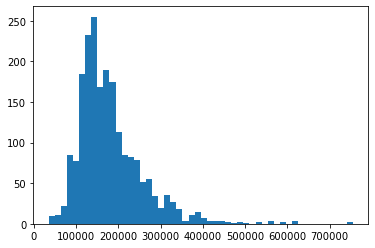

In [176]:
import seaborn as sns
plt.hist(x='Property_Sale_Price',data=df,bins=50)

#conclude-
The above plot shows that the target variable 'Property_Sale_Price' is positively skewed.

In [177]:
df.corr()

,Id,Dwell_Type,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Property_Sale_Price
Id,1.000000,0.043264,0.066902,0.004201,0.083367,0.195635,-0.080204,0.087397,-0.027147,-0.016424,0.004953,-0.007132,-0.022610,0.007956,0.002781,-0.023803,0.005877,0.021117,-0.030925,0.023712,0.000216,0.011009,0.007471,0.009598,-0.010996,0.075043,0.028359,0.016845,0.006044,-0.004948,0.001317,-0.045446,-0.004690,0.031303,-0.007318,0.000234,0.043219,-0.002491
Dwell_Type,0.043264,1.000000,-0.075636,-0.033609,0.046278,0.033023,0.027194,0.042864,-0.004832,-0.034072,-0.025699,-0.022296,-0.068557,-0.078372,0.101374,0.004985,0.029368,-0.016284,-0.004521,0.056762,0.066188,-0.005343,0.074835,0.019444,-0.031639,0.044238,-0.001193,-0.013785,0.004620,0.002153,-0.006529,-0.011966,-0.012021,0.001625,-0.003942,-0.020589,0.018891,-0.017399
LotFrontage,0.066902,-0.075636,1.000000,0.311156,0.108095,-0.011213,0.092680,0.101034,0.129620,0.139424,0.062472,0.112684,0.284690,0.357239,0.070194,0.023235,0.320638,0.087222,-0.037956,0.176271,0.048311,0.228194,0.006560,0.294922,0.226642,0.067647,0.233973,0.269121,0.082081,0.106846,-0.002309,0.042993,0.021500,0.124087,-0.005094,0.025110,0.025584,0.279836
LotArea,0.004201,-0.033609,0.311156,1.000000,0.078232,0.014209,-0.010551,0.017766,0.064370,0.164989,0.075875,0.000127,0.200794,0.244940,0.036583,-0.001199,0.209442,0.126283,0.031688,0.097835,0.003932,0.107307,-0.008350,0.155519,0.211193,-0.022035,0.128792,0.144898,0.121530,0.064376,-0.023199,0.010594,0.035370,0.062458,0.030949,-0.001707,-0.006478,0.211572
OverallQual,0.083367,0.046278,0.108095,0.078232,1.000000,-0.010092,0.335326,0.379579,0.283981,0.163501,-0.058146,0.197844,0.354046,0.308402,0.209623,-0.013395,0.401340,0.084128,-0.047402,0.382428,0.190106,0.059223,-0.111588,0.272410,0.255236,0.381405,0.399407,0.373203,0.155307,0.217044,-0.080219,0.000451,0.021561,0.045138,-0.034206,0.033685,-0.021130,0.523553
OverallCond,0.195635,0.033023,-0.011213,0.014209,-0.010092,1.000000,-0.245303,0.084102,-0.083282,-0.035849,0.027023,-0.098924,-0.130098,-0.087931,0.013921,-0.009863,-0.053220,-0.029309,0.048357,-0.116006,-0.040809,-0.010460,-0.019415,-0.034231,-0.031404,-0.147551,-0.113676,-0.084758,0.013854,-0.042208,0.044501,0.017358,0.012021,-0.016993,0.041833,-0.025281,0.035050,-0.049926
YearBuilt,-0.080204,0.027194,0.092680,-0.010551,0.335326,-0.245303,1.000000,0.536129,0.263968,0.207941,-0.027220,0.118779,0.329629,0.235759,0.014821,-0.180458,0.167113,0.141150,-0.017865,0.399802,0.194491,-0.057069,-0.143619,0.080751,0.135165,0.721961,0.456665,0.406962,0.180472,0.179935,-0.322195,0.034056,-0.049156,0.005788,-0.038620,0.027765,-0.006211,0.437662
YearRemodAdd,0.087397,0.042864,0.101034,0.017766,0.379579,0.084102,0.536129,1.000000,0.166549,0.101401,-0.073927,0.198201,0.283802,0.224185,0.136079,-0.085126,0.270691,0.101714,-0.012083,0.422568,0.180755,-0.037185,-0.128308,0.173802,0.106243,0.647469,0.393252,0.336030,0.182932,0.221604,-0.177739,0.039945,-0.036832,-0.009607,-0.011749,0.033514,0.058932,0.475565
MasVnrArea,-0.027147,-0.004832,0.129620,0.064370,0.283981,-0.083282,0.263968,0.166549,1.000000,0.238535,-0.079737,0.124202,0.346359,0.321517,0.191169,-0.071056,0.388811,0.075338,0.026707,0.281699,0.204664,0.102271,-0.054222,0.275450,0.276028,0.241176,0.356654,0.361222,0.123340,0.141377,-0.097651,0.029774,0.063607,0.002936,-0.035352,-0.017798,0.020028,0.482038
BsmtFinSF1,-0.016424,-0.034072,0.139424,0.164989,0.163501,-0.035849,0.207941,0.101401,0.238535,1.000000,-0.060739,-0.508612,0.485476,0.399249,-0.127193,-0.071539,0.176213,0.638649,0.079832,0.040933,0.014429,-0.130357,-0.090372,0.010932,0.220218,0.139292,0.195292,0.258896,0.207229,0.107593,-0.089326,0.0450

In [178]:
import seaborn as sns

<AxesSubplot:>

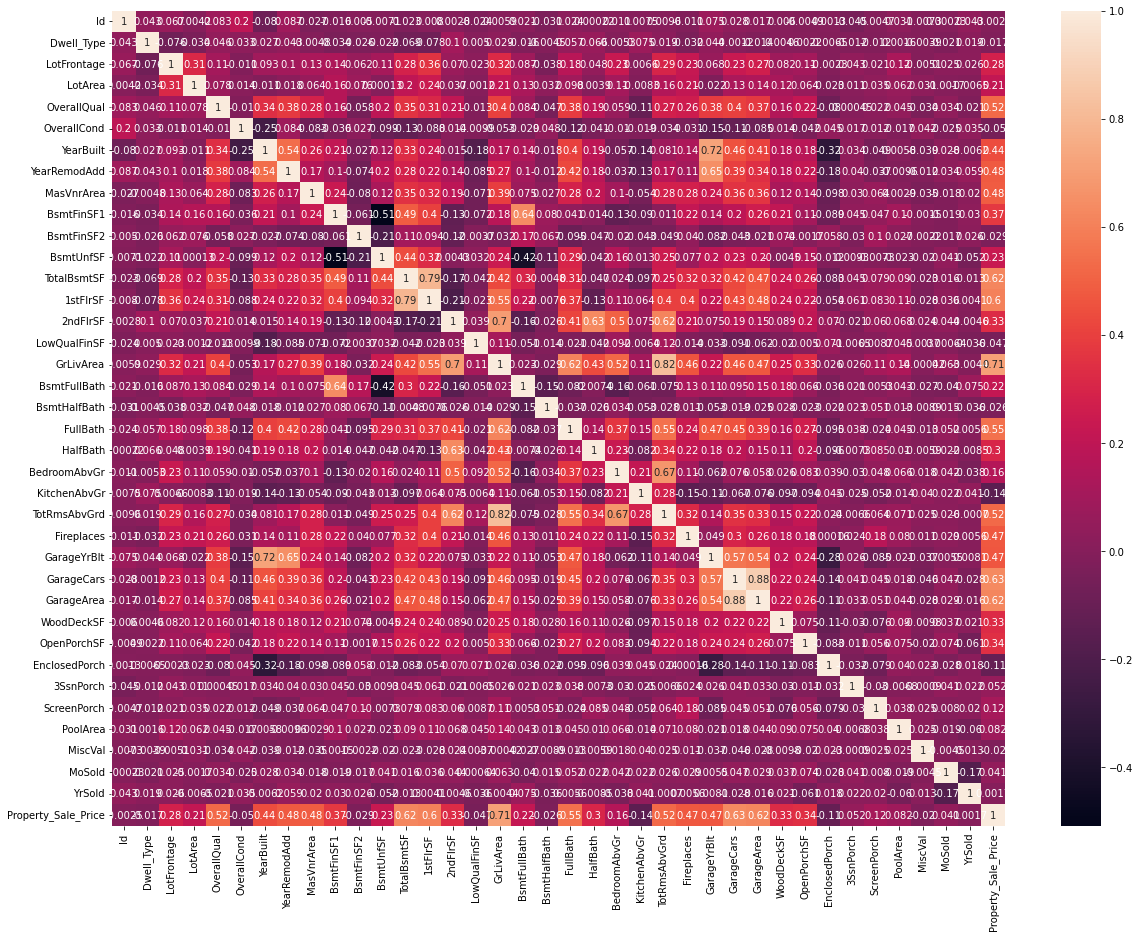

In [179]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

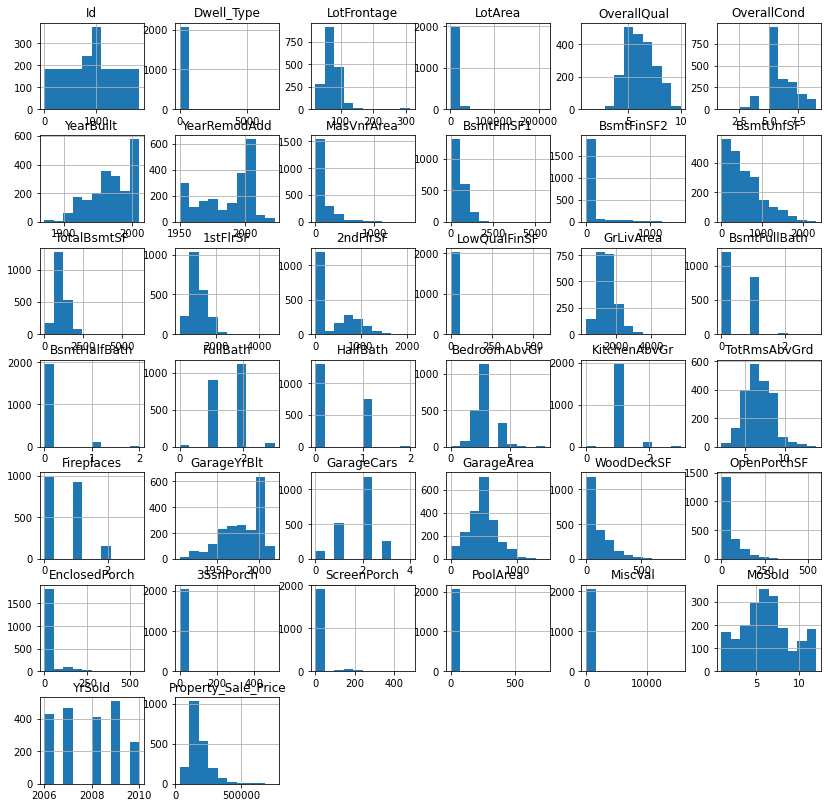

In [180]:
#Distribution of categoric variable
# histogram
df.hist(figsize=(14,14))
plt.show()

In [181]:
# 
#For the categoric variables, we plot the countplot to check the distribution of the each category in the variab

Text(0.5, 1.0, 'Overall Condition vs Property_Sale_Price')

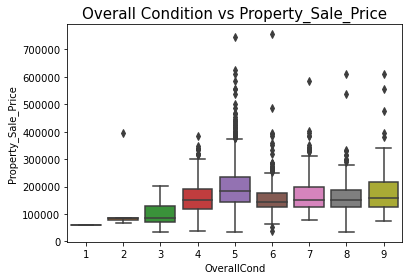

In [182]:
sns.boxplot(y="Property_Sale_Price", x="OverallCond", data= df)
plt.title("Overall Condition vs Property_Sale_Price", fontsize=15)

In [183]:
#sns.pairplot(df, size=2, kind= "scatter", diag_kind="kde")
#plt.show

#he above plot shows that there are extreme observations in the target variable. As these values can affect the prediction of the regression model, we remove such observations before building the model.

In [184]:
# checking missing values

In [185]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [186]:
df.isnull().sum()

Id                        0
Dwell_Type                0
Zone_Class                0
LotFrontage             320
LotArea                   0
Road_Type                 0
Alley                  1944
Property_Shape            0
LandContour               0
Utilities                 0
LotConfig                 0
LandSlope                 0
Neighborhood              0
Condition1                0
Condition2                0
Dwelling_Type             0
HouseStyle                0
OverallQual               0
OverallCond               0
YearBuilt                 0
YearRemodAdd              0
RoofStyle                 0
RoofMatl                  0
Exterior1st               0
Exterior2nd               0
MasVnrType               14
MasVnrArea               14
ExterQual                 0
ExterCond                 0
Foundation                0
BsmtQual                 59
BsmtCond                 59
BsmtExposure             61
BsmtFinType1             59
BsmtFinSF1                0
BsmtFinType2        

In [187]:
df.isnull().sum()[df.isnull().sum() >0]

LotFrontage      320
Alley           1944
MasVnrType        14
MasVnrArea        14
BsmtQual          59
BsmtCond          59
BsmtExposure      61
BsmtFinType1      59
BsmtFinType2      60
Electrical         1
FireplaceQu      988
GarageType       113
GarageYrBlt      113
GarageFinish     113
GarageQual       113
GarageCond       113
PoolQC          2065
Fence           1669
MiscFeature     1993
dtype: int64

In [188]:
# in dataset missing values found 

In [189]:
# # handling of missing value
#Dropping the missing values
#Replacing with previous value - Forward fill
#Replacing with next value - Backward fill
#Replacing with mean
#Replacing with Median:
#Replacing with Mode:
# Drop this unnamed column as it has significant missing values and also drop the id column

In [190]:
# replace the missing value numrical variable

In [191]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())

In [192]:
# replace missing values categrial variable

In [193]:
df['MiscFeature'] = df['MiscFeature'].fillna('None')
df['Alley'] = df['Alley'].fillna('No alley access')
df['Fence'] = df['Fence'].fillna('No Fence')
df['FireplaceQu'] = df['FireplaceQu'].fillna('No Fireplace')
df['GarageCond'] = df['GarageCond'].fillna('No Garage')
df['GarageType'] = df['GarageType'].fillna('No Garage')
df['GarageFinish'] = df['GarageFinish'].fillna('No Garage')
df['GarageQual'] = df['GarageQual'].fillna('No Garage')
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['Electrical']=df['Electrical'].fillna('SBrkr')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('No Basement')
df['BsmtExposure'] = df['BsmtExposure'].fillna('No Basement')
df['BsmtQual'] = df['BsmtQual'].fillna('No Basement')
df['BsmtCond'] = df['BsmtCond'].fillna('No Basement')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('No Basement')
df['PoolQC'] = df['PoolQC'].fillna('Gd')

In [194]:
# recheck the missing values

In [195]:
df.isnull().sum()

Id                     0
Dwell_Type             0
Zone_Class             0
LotFrontage            0
LotArea                0
Road_Type              0
Alley                  0
Property_Shape         0
LandContour            0
Utilities              0
LotConfig              0
LandSlope              0
Neighborhood           0
Condition1             0
Condition2             0
Dwelling_Type          0
HouseStyle             0
OverallQual            0
OverallCond            0
YearBuilt              0
YearRemodAdd           0
RoofStyle              0
RoofMatl               0
Exterior1st            0
Exterior2nd            0
MasVnrType             0
MasVnrArea             0
ExterQual              0
ExterCond              0
Foundation             0
BsmtQual               0
BsmtCond               0
BsmtExposure           0
BsmtFinType1           0
BsmtFinSF1             0
BsmtFinType2           0
BsmtFinSF2             0
BsmtUnfSF              0
TotalBsmtSF            0
Heating                0


In [196]:
#after replacing the null values for the required variables, recheck the null values

In [197]:
# cheking the otlier

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Property_Sale_Price'>

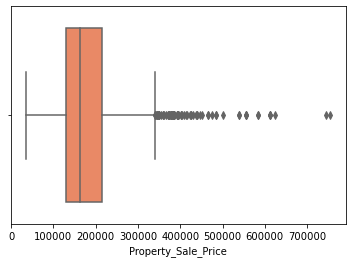

In [198]:
# plot a boxplot of target variable to detect the outliers
sns.boxplot(df['Property_Sale_Price'], color='coral')


# handling the outlier with the help of iqr method

In [199]:
for cols in df.columns[:-1]:
    if df[cols].dtype == object:
        continue
    else:
        Q1 = df[cols].quantile(q=0.25)
        Q3 = df[cols].quantile(q=0.75)
        iqr = Q3 - Q1
    
        low = Q1 - 1.5*(Q3-Q1)
        high = Q3 + 1.5*(Q3-Q1)
        df.loc[(df[cols]<low) | (df[cols]>high),cols] = df[cols].median()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Property_Sale_Price'>

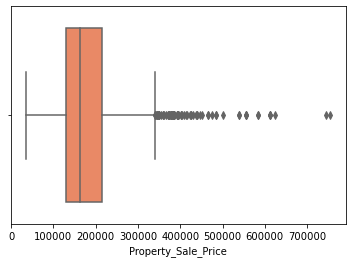

In [200]:
sns.boxplot(df['Property_Sale_Price'], color='coral')

In [201]:
df=df.drop(['Id'],axis=1)

In [202]:
# converted categarical variabke ti numerical 

In [203]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df[df.select_dtypes(include=['object']).columns]=df[df.select_dtypes(include=['object']).columns].apply(le.fit_transform)


In [204]:
df.head()

,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,60,3,65.0,8450,1,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,4,3,2,706,6,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,3,1,2003.0,2,2,548,5,5,2,0,61,0,0,0,0,2,4,1,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,4,1,0,978,6,0,284,1262,1,0,1,4,1262,0,0,1262,0,0,2,0,3,1,3,6,6,1,5,1,1976.0,2,2,460,5,5,2,298,0,0,0,0,0,2,4,1,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,4,2,2,486,6,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,5,1,2001.0,2,2,608,5,5,2,0,42,0,0,0,0,2,4,1,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,3,4,0,4,1,3,0,216,6,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,1998.0,3,3,642,5,5,2,0,35,0,0,0,0,2,4,1,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,4,0,2,655,6,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,5,1,2000.0,2,3,836,5,5,2,192,84,0,0,0,0,2,4,1,0,12,2008,8,4,250000


In [205]:
df.shape

(2073, 80)

In [206]:
df=df1

# Now data is ready for the learn algorithms

In [207]:
# Linear Regression (OLS)

In [208]:
# selecting the in your data independent(x) and dependent(y) variable

In [209]:
X = df.drop(['Property_Sale_Price'], axis = 1)
y= df[['Property_Sale_Price']]


In [210]:
# The data is sesitive to datapoint to go for the Standardisation

In [211]:
# standerdisation of data
# To bring the data into one magnitude  we are going to standardization
# two type of standardiseation - 1] min max scalar 2]standardization

In [212]:
from sklearn.preprocessing import StandardScaler

scalar=StandardScaler()

scaled=scalar.fit_transform(X)

In [213]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [214]:
# split data into train subset and test subset for predictor and target variables
# 'test_size' returns the proportion of data to be included in the test set
# set 'random_state' to generate the same dataset each time you run the code 


In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42)


In [216]:
# check the dimensions of the train & test subset for 
# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (1392, 79)
The shape of X_test is: (597, 79)
The shape of y_train is: (1392, 1)
The shape of y_test is: (597, 1)


In [217]:
from sklearn.linear_model import LinearRegression

In [218]:
# instantiate the model
mlr= LinearRegression()  

In [219]:
# fit the model with data
mlr.fit(X_train, y_train)

LinearRegression()

In [220]:
#Printing the model coefficients
print('Intercept: ', slr.intercept_)
print('Coefficient:', slr.coef_)

Intercept:  [995602.8577058]
Coefficient: [[-2.13139016e+02 -2.54036081e-09 -1.67062808e-10  5.00506303e-10
   1.25206157e-09  2.35331754e-11 -2.23003119e+03  2.37434961e-10
   2.17710294e-10  5.34503316e+02  2.61479727e-12  4.12172949e+02
  -7.75344233e-11 -1.08229870e-10 -5.45696821e-12 -9.00253299e+02
   6.54608584e+03  3.79621968e+03  5.97247803e+01  1.33245882e+02
  -1.09139364e-11  7.27595761e-12 -1.58693881e+02 -1.85613156e+02
   7.94422954e+03  1.81898940e-12 -1.27026047e+03  2.27373675e-12
   3.01917649e+03 -1.15326642e+04  7.27595761e-12  1.00044417e-11
  -5.69874224e+02  2.35970649e+01 -9.09494702e-13  4.54747351e-13
   7.89537997e+00  5.25936183e+00  0.00000000e+00 -2.69566887e+03
   0.00000000e+00  0.00000000e+00  3.99969436e+01  2.39695637e+01
   0.00000000e+00  5.69439247e+00  6.32309137e+03  0.00000000e+00
   9.61209792e+03  1.22110238e+04  3.53417718e+03  0.00000000e+00
   4.56114099e+03  1.89814825e+03  0.00000000e+00  1.59531612e+04
  -4.88589232e+03  1.57735297e+03 

In [221]:
# prediction on your test data
y_test_pred=mlr.predict(X_test)
# prediction on train data
y_train_pred=mlr.predict(X_train)

In [222]:
from sklearn.metrics import r2_score
y_test_pred = mlr.predict(X_test)
y_train_pred = s=mlr.predict(X_train)
a =  r2_score(y_train,y_train_pred)
b = r2_score(y_test,y_test_pred)
print("trainning = {} testing ={} ".format(a,b))

trainning = 0.8442364056100635 testing =0.8073596582359149 


In [223]:
error_train=y_train - y_train_pred
error_test=y_test - y_test_pred

In [224]:
np.mean(error_train)

C:\Users\DELL\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Property_Sale_Price   -234.948276
dtype: float64

(array([  3.,   1.,   1.,   0.,   1.,   1.,   1.,   1.,   2.,   3.,   4.,
          5.,   8.,  10.,  15.,  10.,  24.,  44.,  45.,  52.,  66.,  74.,
         74.,  89.,  97.,  92., 113.,  95.,  82.,  75.,  68.,  39.,  43.,
         28.,  29.,  17.,  13.,  17.,  10.,  10.,   8.,   6.,   6.,   4.,
          1.,   2.,   0.,   0.,   2.,   1.]),
 array([-94908.  , -91227.56, -87547.12, -83866.68, -80186.24, -76505.8 ,
        -72825.36, -69144.92, -65464.48, -61784.04, -58103.6 , -54423.16,
        -50742.72, -47062.28, -43381.84, -39701.4 , -36020.96, -32340.52,
        -28660.08, -24979.64, -21299.2 , -17618.76, -13938.32, -10257.88,
         -6577.44,  -2897.  ,    783.44,   4463.88,   8144.32,  11824.76,
         15505.2 ,  19185.64,  22866.08,  26546.52,  30226.96,  33907.4 ,
         37587.84,  41268.28,  44948.72,  48629.16,  52309.6 ,  55990.04,
         59670.48,  63350.92,  67031.36,  70711.8 ,  74392.24,  78072.68,
         81753.12,  85433.56,  89114.  ]),
 <BarContainer object o

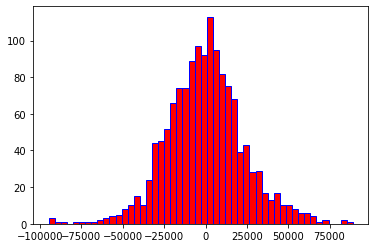

In [225]:
plt.hist(error_train,bins=50,color='r',edgecolor='b')

In [232]:
pred_actual_df=pd.DataFrame()
pred_actual_df['Actual']=y_train
pred_actual_df['Predict']=y_train_pred

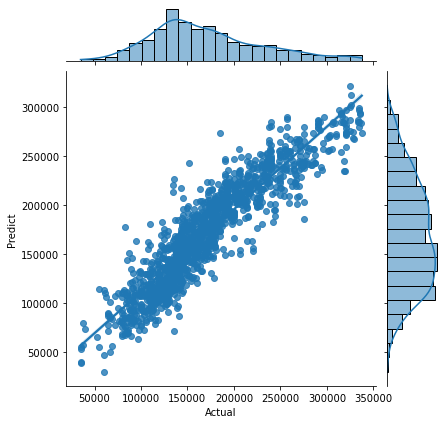

In [233]:
sns.jointplot(x='Actual',y='Predict',data=pred_actual_df,kind='reg')